In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

C:\Users\user1\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_excel("C:/Users/user1/Downloads/random_forest_dataset.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Sl No,USN,Name,Title,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total,Grade
1,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85,34,93,18.6,13,4,35.6,85.2,A
2,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82,32.8,77,15.4,15,5,35.4,85,A
3,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84,16.8,82,32.8,88,17.6,13,1,31.6,81.2,A
4,4,1RV21MC004,AISHWARYA K KAMBLE,Analysis and Deployment of an efficient Deep L...,88,17.6,85,34,96,19.2,13,4,36.2,87.8,A


In [ ]:
!pip install --upgrade openpyxl

In [4]:
df = pd.read_excel("C:/Users/user1/Downloads/random_forest_dataset.xlsx", header=1)
df.head()

,Sl No,USN,Name,Title,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total,Grade
0,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85.0,34.0,93,18.6,13.0,4.0,35.6,85.2,A
1,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0,A
2,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84,16.8,82.0,32.8,88,17.6,13.0,1.0,31.6,81.2,A
3,4,1RV21MC004,AISHWARYA K KAMBLE,Analysis and Deployment of an efficient Deep L...,88,17.6,85.0,34.0,96,19.2,13.0,4.0,36.2,87.8,A
4,5,1RV21MC005,AISHWARYA NAGARAJ BABALESHWAR,Development of Deep Learning Model for Varied ...,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0,A


In [5]:
df.isnull().sum()

Sl No     0
USN       0
Name      0
Title     1
P1        0
C1        0
P2        0
C2        0
P3        0
C3        0
R1        8
T1        8
P3T       0
Total     0
Grade     8
dtype: int64

In [7]:
# handle outliers
df.dropna(inplace=True)
# there is this extra space after the column names
x = df.drop(['Sl No ',"USN ","Name ","Title ","Grade"],axis=1)
y = df.Grade

In [8]:
x.head()

,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total
0,78,15.6,85.0,34.0,93,18.6,13.0,4.0,35.6,85.2
1,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0
2,84,16.8,82.0,32.8,88,17.6,13.0,1.0,31.6,81.2
3,88,17.6,85.0,34.0,96,19.2,13.0,4.0,36.2,87.8
4,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Grade'])

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

Total     0.285888
C2        0.155264
P2        0.134901
P3T       0.112617
P1        0.090618
C1        0.085522
R1        0.038839
P3        0.036235
C3        0.033041
T1        0.027075
dtype: float64


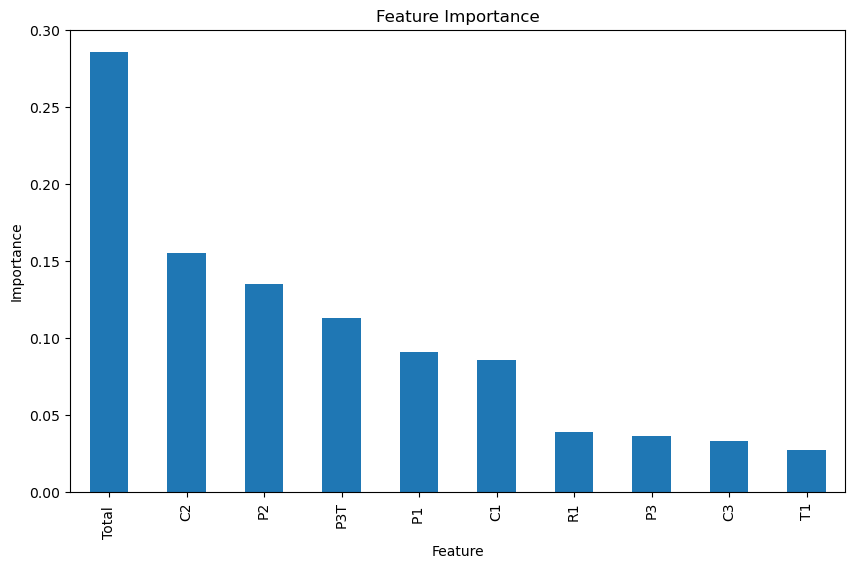

In [12]:
feature_importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feature_importances)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid correctly
param_grid = {
    'n_estimators': [100, 200, 300],  # Fixed key name
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]  # Fixed "min_samples_lear" typo
}

grid_search = GridSearchCV(estimator=rf, param_grid = param_grid, cv=5, n_jobs=-1,verbose=1)

grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [16]:
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [17]:
best_rf = RandomForestClassifier(random_state=42,**best_params)
best_rf.fit(x_train,y_train)
y_pred = best_rf.predict(x_test)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    classification_report
)
# Print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# Print classification report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))



🔹 Accuracy: 0.9394
🔹 Precision: 0.9472
🔹 Recall: 0.9394
🔹 F1 Score: 0.9390

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.80      1.00      0.89         4
           3       1.00      0.85      0.92        13

    accuracy                           0.94        33
   macro avg       0.91      0.95      0.93        33
weighted avg       0.95      0.94      0.94        33



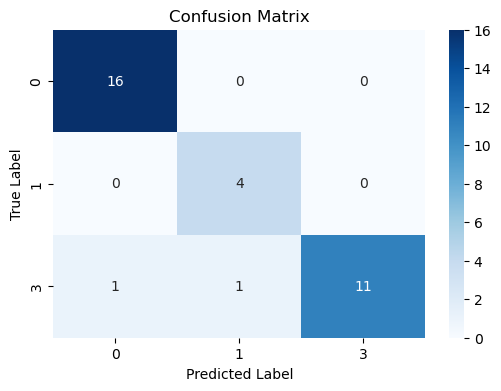

In [34]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


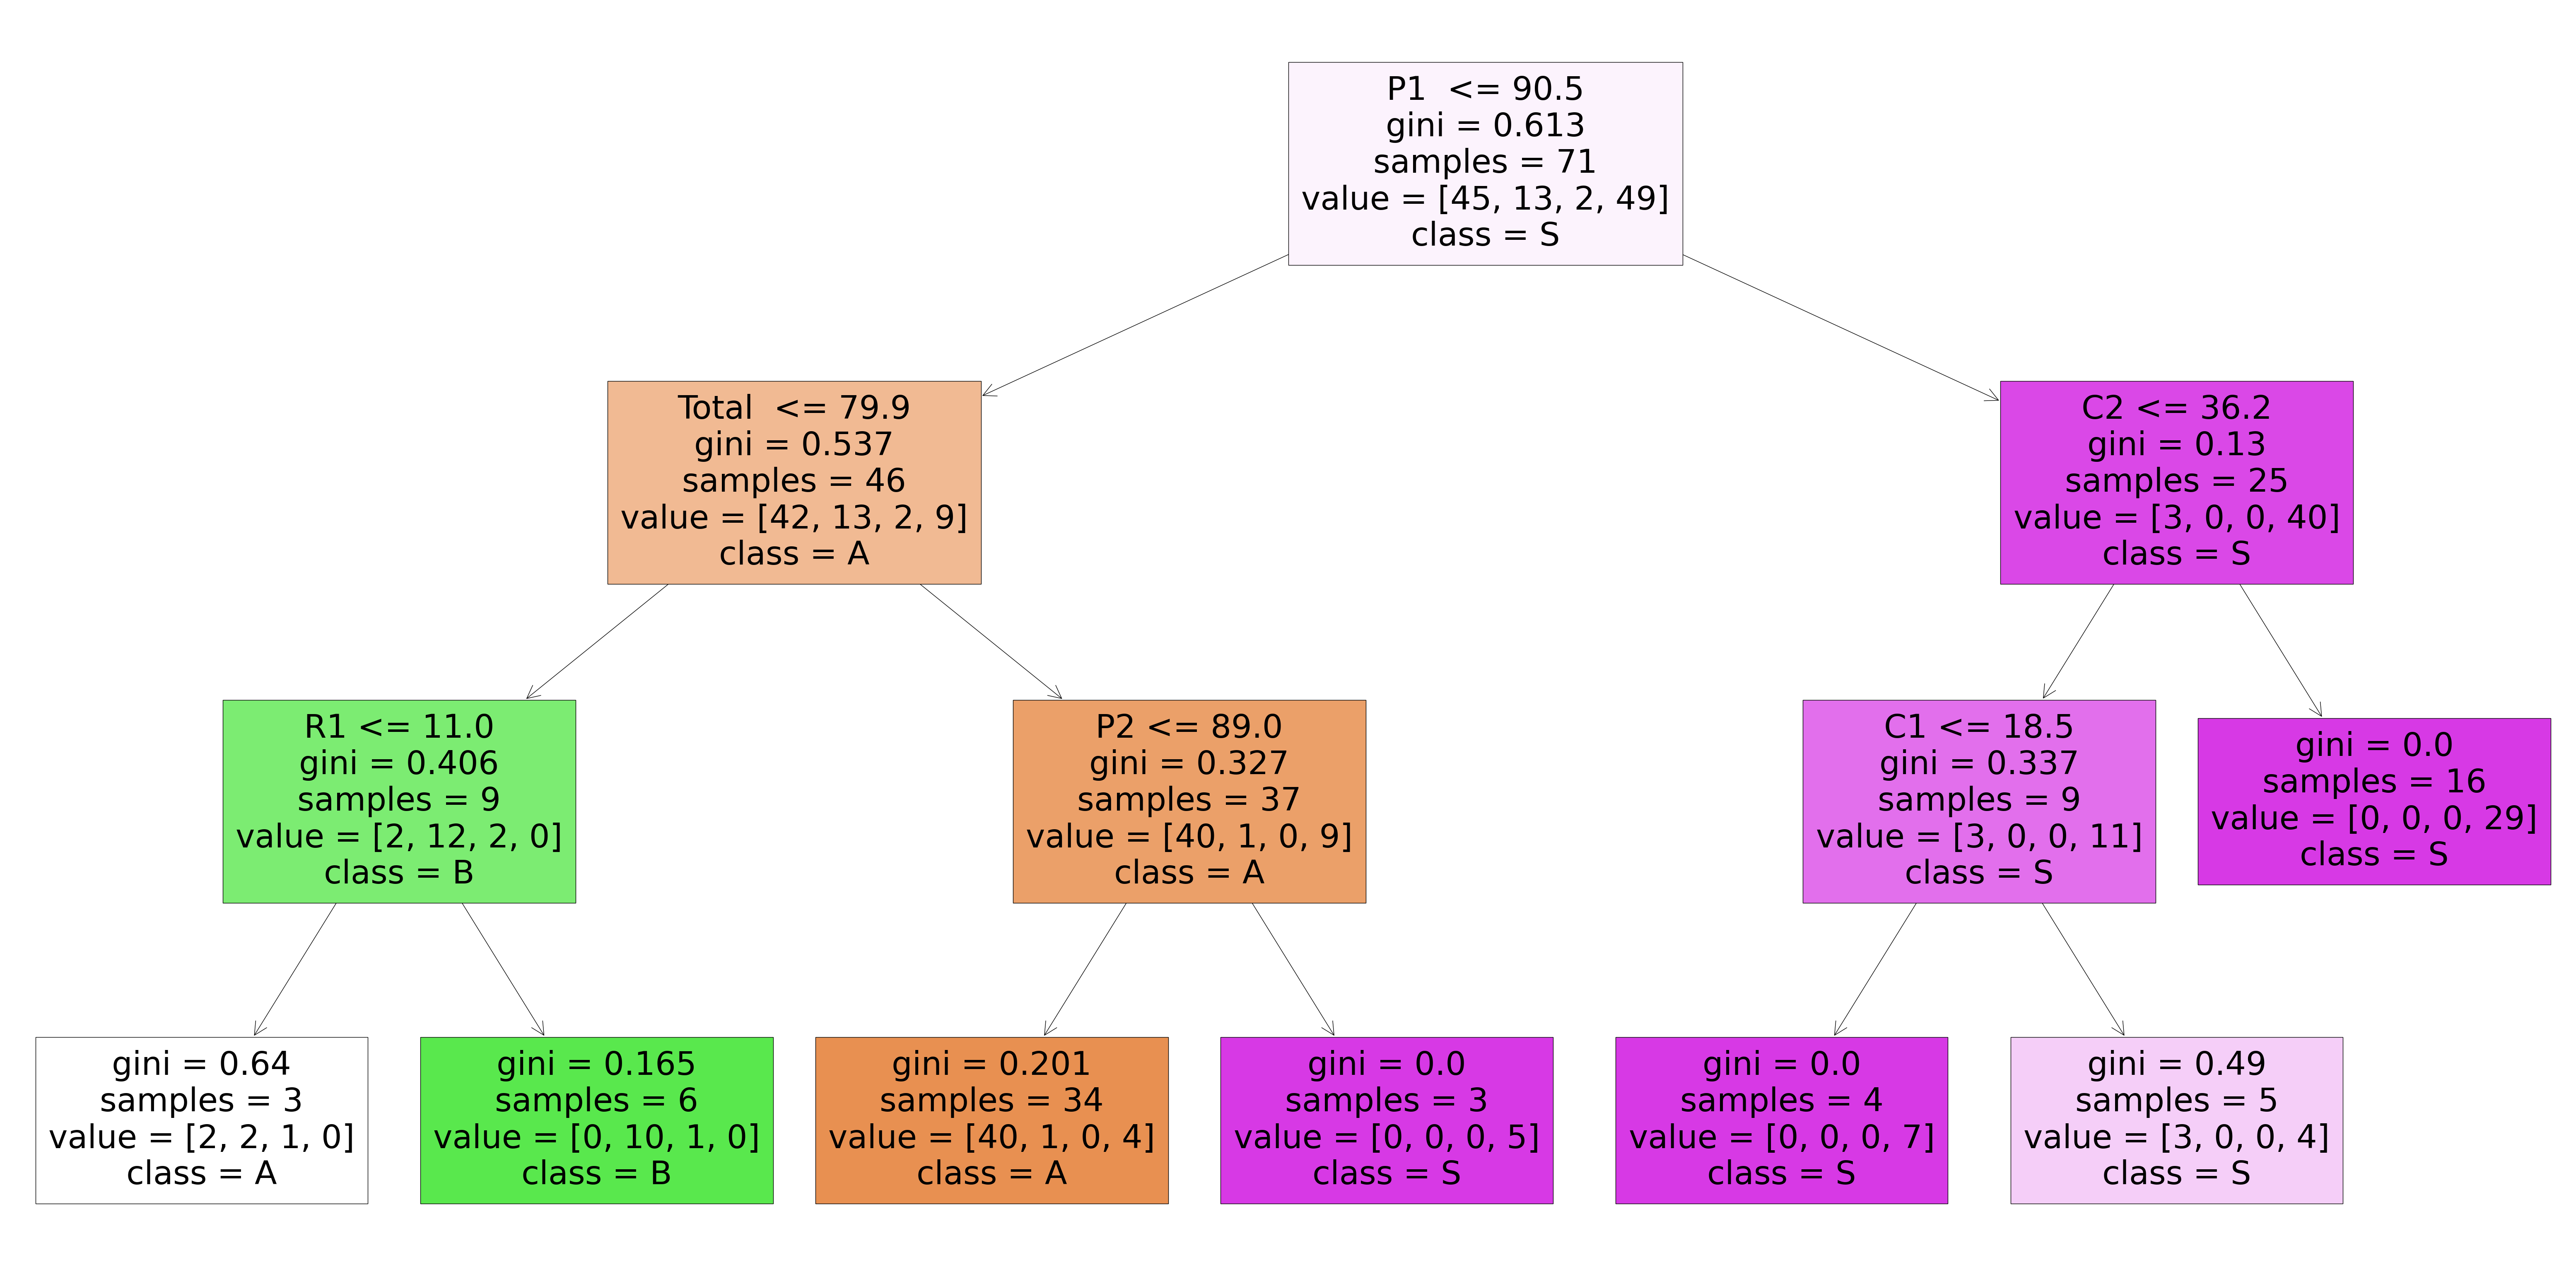

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(best_rf.estimators_[5], feature_names = x.columns,class_names=['A', 'B', 'C', 'S'],filled=True);

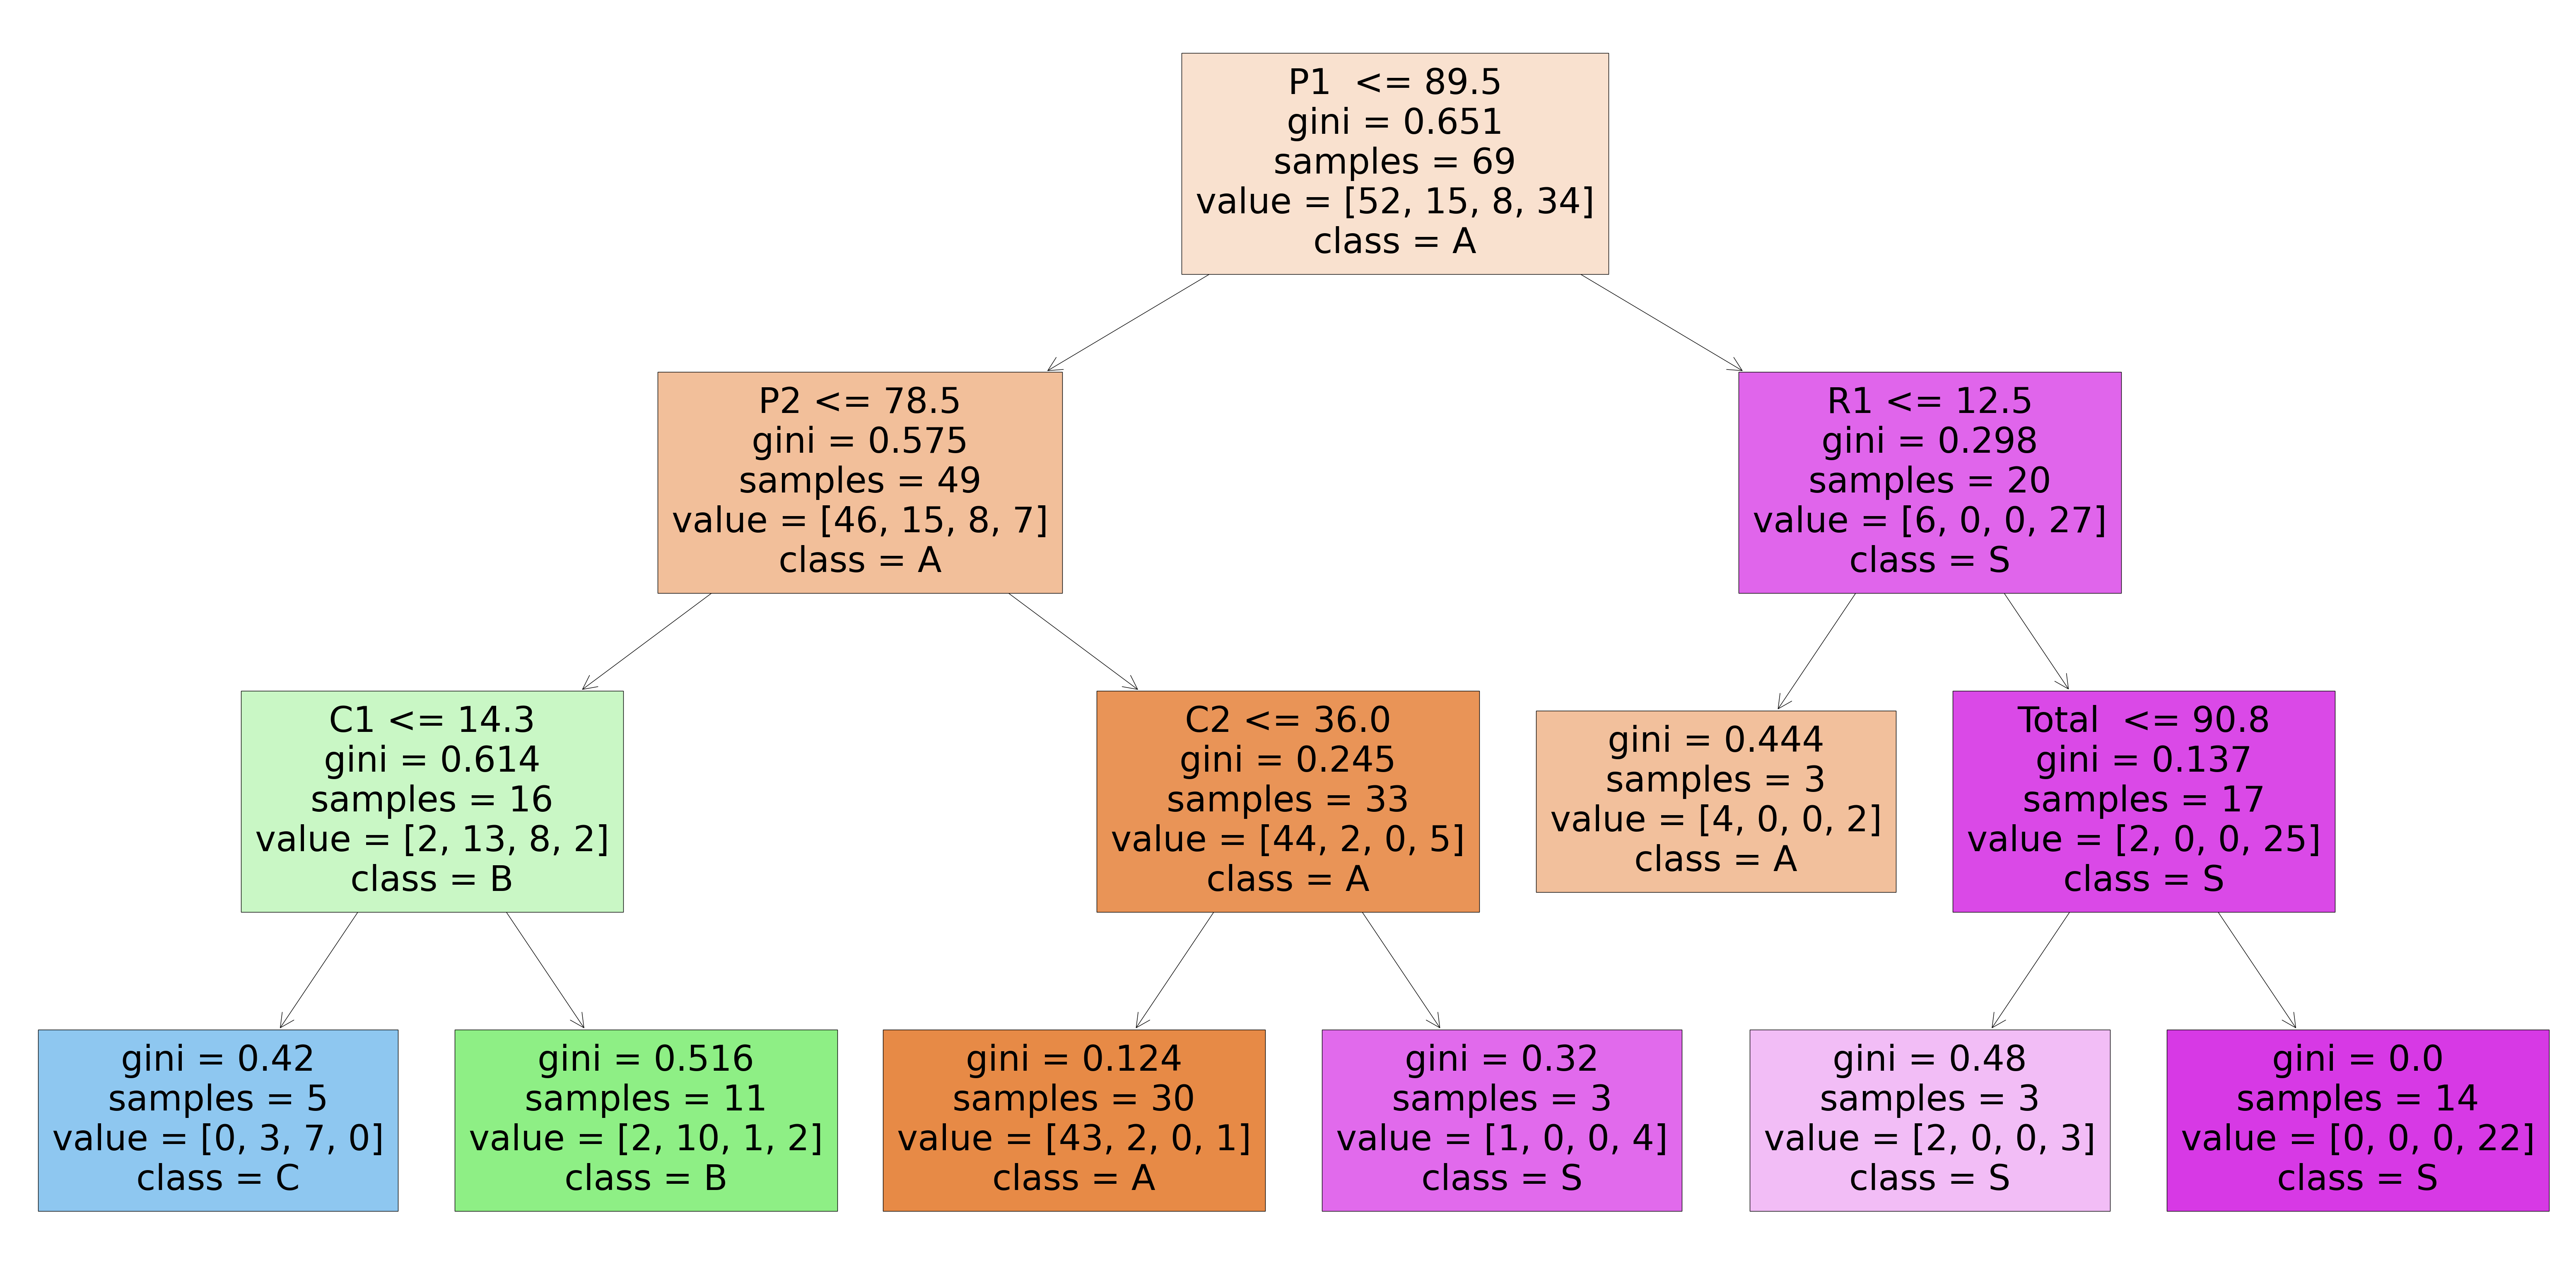

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(best_rf.estimators_[7], feature_names = x.columns,class_names=['A', 'B', 'C', 'S'],filled=True);

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 269}


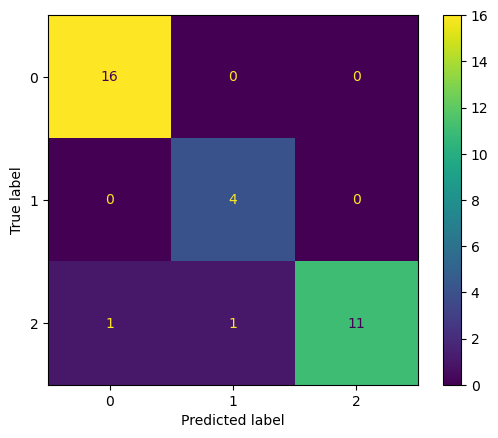

In [41]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
param_dist = {
  'n_estimators': randint(100, 500),
  'max_depth': randint(3, 15),
  'min_samples_split': randint(2, 10),
  'min_samples_leaf': randint(1, 5)
}


# Create a random forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(
  rf, param_distributions=param_dist,
  n_iter=10, cv=5, scoring='accuracy',
  n_jobs=-1, random_state=42)
rand_search.fit(x, y)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
    # Generate predictions with the best model
y_pred = best_rf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();